In [4]:
import pandas as pd

Big_Five = pd.read_csv('../data/data-to-convert.csv',index_col=0)

In [5]:
from sklearn.decomposition import PCA
import seaborn as sns

def show_clusters_size(clusters):
    unique, counts = np.unique(clusters, return_counts=True)
    print(dict(zip(unique, counts)))

# Spectral Clustering (100)

In [6]:
# Other strategy considering all features
Big_Five100=Big_Five.iloc[:,:100]
# Applying the analysis only on 2000 instances for computational reasons.
df_model = Big_Five100.sample(2000)
indexes = range(50,100)
for index in indexes:
   df_model.iloc[:,index] = df_model.iloc[:,index] / 1000
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
id,,,,,,,,,,,,,,,,,,,,,
594763,3.0,3.0,4.0,2.0,4.0,4.0,3.0,1.0,3.0,2.0,...,1.450,2.392,0.784,1.888,2.138,1.474,1.058,1.490,3.574,0.838
955373,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.973,5.343,1.820,10.239,1.901,2.429,3.602,1.223,2.126,2.424
309952,1.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0,1.0,...,3.444,4.382,1.822,4.528,2.135,3.112,3.661,2.275,2.193,2.254
101990,1.0,2.0,4.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,...,3.430,4.712,7.040,8.376,4.536,4.512,2.818,2.551,1.545,15.440
122388,3.0,3.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,...,2.741,5.796,3.456,7.010,5.175,3.971,17.467,6.518,8.344,3.007


<AxesSubplot:>

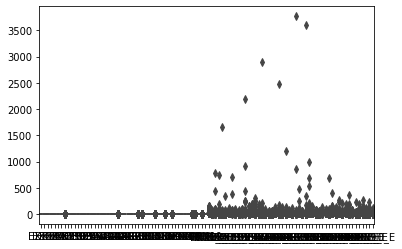

In [7]:
import seaborn as sns

sns.boxplot(data=df_model)

<AxesSubplot:>

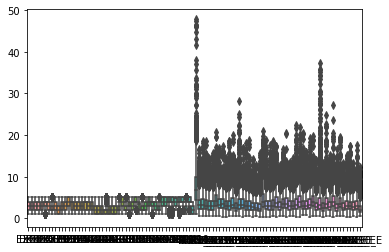

In [8]:
import numpy as np
from scipy.stats import stats

Q1 = df_model.quantile(0.25)
Q3 = df_model.quantile(0.75)
IQR = Q3 - Q1
df_model_out = df_model[~((df_model < (Q1 - 40 * IQR)) |(df_model > (Q3 + 40 * IQR))).any(axis=1)]
z = np.abs(stats.zscore(df_model_out))
df_model_out =df_model_out[(z < 3).all(axis=1)]
sns.boxplot(data=df_model_out)

In [9]:
df_model_out.shape

(1162, 100)

In [10]:
# Hopkins statistic with this new data

from pyclustertend import hopkins

1-hopkins(df_model_out, df_model_out.shape[0])

0.727516928559632

In [11]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering()
sc.fit(df_model_out)
Clusters = sc.labels_

/Users/jacopo/venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [12]:
show_clusters_size(Clusters)

{0: 1155, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


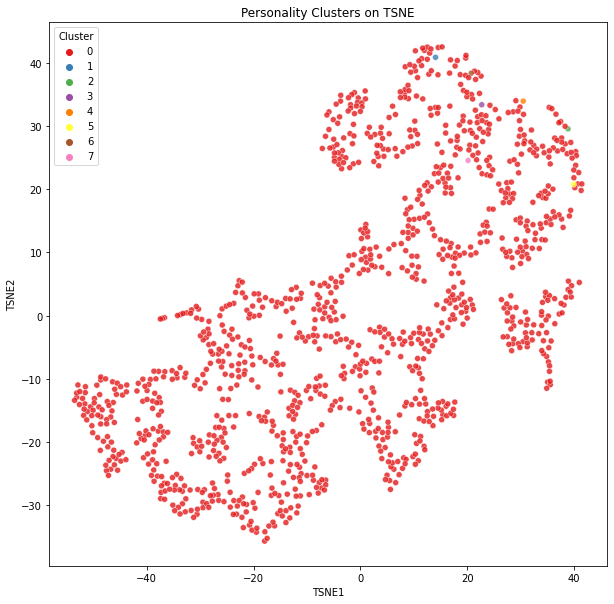

In [13]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model_out)
df_pca = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
Xtsne = TSNE(n_components=2).fit_transform(df_pca)
dftsne = pd.DataFrame(data=Xtsne, columns = ['TSNE1','TSNE2'])
dftsne['Cluster'] = Clusters
plt.figure(figsize=(10,10))
sns.scatterplot(data=dftsne,x='TSNE1',y='TSNE2',hue='Cluster',legend="full", palette='Set1', alpha=0.8)
plt.title('Personality Clusters on TSNE');